In [1]:
import os
import string
import pandas as pd
from statistics import stdev, mean
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Activation, Conv1D, MaxPooling1D, LSTM

# Text Classification

## Introduction
This project build a classifier to analyze the sentiment of reviews using Keras1 and Python. The text data store in two folders: one folder involves positive reviews, and one folder involves negative reviews.

## Data Exploration and Pre-processing


First, I use binary encoding for the sentiments , i.e y = 1 for positive sentiments and y = −1 for negative sentiments. Since the provided data are pretty clean, we can remove the punctuation and numbers from the data for further analysis.


In [4]:
#pos = os.listdir("../data/pos")
#neg = os.listdir("../data/neg")

from google.colab import drive
drive.mount('/content/drive')
drive_folder = '/content/drive/My Drive/552project/data'

pos = os.listdir(drive_folder + '/pos/')
neg = os.listdir(drive_folder + '/neg/')

data = []
punc_dig = string.punctuation + string.digits

for path in pos:
    f = open("/content/drive/My Drive/552project/data/pos/" + path)
    review = f.readlines()
    f.close()
    for i in range(len(review)):
        review[i] = review[i].translate(str.maketrans('', '', punc_dig))
    data.append([int(path[2:5]), " ".join(review), 1])

for path in neg:
    f = open("/content/drive/My Drive/552project/data/neg/" + path)
    review = f.readlines()
    f.close()
    for i in range(len(review)):
        review[i] = review[i].translate(str.maketrans('', '', punc_dig))
    data.append([int(path[2:5]), " ".join(review), -1])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The name of each text file starts with cv number. Here, I split the data use text files 0-699 in each class for training and 700-999 for testing.


In [5]:
data = pd.DataFrame(data, columns = ["num", "text", "class"])

In [6]:
train = data[data["num"] < 700]
test = data[data["num"] >= 700]

Count the number of unique words in the whole dataset (train + test) and print it out.

In [7]:
# resource: https://stackoverflow.com/questions/18936957/count-distinct-words-from-a-pandas-data-frame

results = set()
data['text'].str.lower().str.split().apply(results.update)
print("number of unique words: ", len(results))

number of unique words:  46830


In [ ]:
#result = data.text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

Calculate the average review length and the standard deviation of review lengths. Report the results.


In [ ]:
#data0 = data.replace("\n", " ")

In [8]:
review_len = []

for i in data["text"]:
    review_len.append(len(i.split()))

print("average: ", mean(review_len))
print("standard deviation: ", stdev(review_len))

average:  644.3555
standard deviation:  285.0511431249635


### Visualization
Plot the histogram of review lengths.


(array([ 75., 537., 743., 417., 136.,  53.,  23.,  13.,   0.,   3.]),
 array([  16. ,  250.7,  485.4,  720.1,  954.8, 1189.5, 1424.2, 1658.9,
        1893.6, 2128.3, 2363. ]),
 <BarContainer object of 10 artists>)

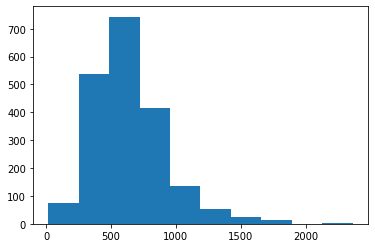

In [ ]:
plt.hist(review_len)

### NLP/Deep Learning
To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to represent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.


In [ ]:
token = Tokenizer()
token.fit_on_texts(data["text"])
pop = token.word_index
pop

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'that': 8,
 'it': 9,
 'as': 10,
 'with': 11,
 'for': 12,
 'his': 13,
 'this': 14,
 'film': 15,
 'but': 16,
 'he': 17,
 'i': 18,
 'on': 19,
 'are': 20,
 'by': 21,
 'be': 22,
 'its': 23,
 'an': 24,
 'not': 25,
 'one': 26,
 'movie': 27,
 'who': 28,
 'from': 29,
 'at': 30,
 'was': 31,
 'have': 32,
 'has': 33,
 'her': 34,
 'you': 35,
 'they': 36,
 'all': 37,
 'so': 38,
 'like': 39,
 'about': 40,
 'out': 41,
 'more': 42,
 'when': 43,
 'which': 44,
 'their': 45,
 'up': 46,
 'or': 47,
 'what': 48,
 'some': 49,
 'just': 50,
 'if': 51,
 'there': 52,
 'she': 53,
 'him': 54,
 'into': 55,
 'even': 56,
 'only': 57,
 'than': 58,
 'no': 59,
 'we': 60,
 'good': 61,
 'most': 62,
 'time': 63,
 'can': 64,
 'will': 65,
 'story': 66,
 'films': 67,
 'been': 68,
 'would': 69,
 'much': 70,
 'also': 71,
 'characters': 72,
 'other': 73,
 'get': 74,
 'character': 75,
 'do': 76,
 'them': 77,
 'very': 78,
 'two': 79,
 'first': 80,
 'after': 81,

In [ ]:
#data["split_text"] = data['text'].str.lower().str.split()


In [ ]:
data["token_text"] = token.texts_to_sequences(data["text"])
data["token_text"]

0       [2499, 181, 1, 4195, 6, 289, 26, 4, 1, 62, 372...
1       [98, 2275, 8122, 6, 2, 1302, 2011, 17, 6, 71, ...
2       [18, 174, 679, 2, 891, 4, 1, 202, 47, 38, 1497...
3       [2, 27, 186, 68, 10, 1048, 1988, 46, 10, 1, 10...
4       [61, 65, 1967, 6, 79, 101, 7, 26, 24, 2859, 15...
                              ...                        
1995    [1974, 43, 2, 14919, 46799, 7, 1, 4917, 2243, ...
1996    [23, 144, 1, 6233, 4, 1, 23074, 4, 1293, 312, ...
1997    [25627, 11, 1, 9732, 3671, 4, 101, 8, 621, 11,...
1998    [3, 144, 1, 19667, 1448, 1489, 427, 4, 1225, 3...
1999    [3082, 196, 495, 3, 50, 1634, 528, 3082, 490, ...
Name: token_text, Length: 2000, dtype: object

Select a review length L that 70% of the reviews have a length below it.


In [ ]:
L = int(np.percentile(review_len, 70))
L

737

Then, truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L.3


In [ ]:
data["pad_text"] = list(pad_sequences(data["token_text"], maxlen = L))
data["pad_text"]

0       [109, 1141, 11933, 1194, 4196, 2, 3737, 3641, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [285, 5, 129, 5, 5, 276, 42, 9269, 36, 17378, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
1995    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1996    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1997    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1998    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1999    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: pad_text, Length: 2000, dtype: object

## Word Embeddings


### i. Use tokenized text as inputs to a deep neural network.
However, a recent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word embeddings. \Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning."4. Most deep learning modules (including Keras) provide a convenient way to convert positive integer representations of words into a word embedding by an \Embedding layer." The layer accepts arguments that define the mapping of words into embeddings,including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the \output dimension." We would like to use a word embedding layer for this project. Assume that we are interested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words
that are not among the top 5,000 words in the document.5 If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32 × L matrix.

### ii. Flatten the matrix of each document to a vector.

In [ ]:
input_text = np.array(list(data["pad_text"]))
input_text[input_text >= 5000] = 0

In [ ]:
#resource: https://www.cnblogs.com/Renyi-Fan/p/13809918.html
model = Sequential()
model.add(Embedding(5000, 32, input_length = L))
model.add(Flatten())
model.compile('rmsprop', 'mse')
print(model.summary)

embed_text = model.predict(input_text)
print(model.layers[0].get_weights())
print(embed_text)

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x160e69df0>>
[array([[-0.03551153, -0.0312135 ,  0.02762629, ..., -0.00306189,
         0.03902471, -0.01229275],
       [ 0.04268488, -0.04910192, -0.04501715, ...,  0.00510366,
         0.04548797, -0.00195887],
       [ 0.03849134,  0.03062275,  0.03373922, ...,  0.01225618,
        -0.02856541,  0.0476712 ],
       ...,
       [ 0.02141747,  0.04477562, -0.00798661, ..., -0.0272519 ,
         0.02140928,  0.04162479],
       [ 0.03989843,  0.04823219, -0.00834541, ..., -0.02606398,
        -0.00012935, -0.02234277],
       [-0.01735542,  0.02892314,  0.02645124, ..., -0.00246954,
        -0.02422092,  0.02956215]], dtype=float32)]
[[ 0.03333518 -0.02617295 -0.02261096 ... -0.04879908 -0.02016357
  -0.00410762]
 [-0.03551153 -0.0312135   0.02762629 ... -0.00327522 -0.00395964
   0.02752754]
 [-0.0490008  -0.04394411 -0.0189552  ... -0.00306189  0.03902471
  -0.01229275]
 ...
 [-0.03551153

## Multi-Layer Perceptron

In [ ]:
Data = data[["num", "class"]]
Data["emb_text"] = list(embed_text)
Data["class"] = Data["class"].replace(-1, 0)

<ipython-input-18-5e7af8508837>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["emb_text"] = list(embed_text)
<ipython-input-18-5e7af8508837>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["class"] = Data["class"].replace(-1, 0)


In [ ]:
Train = Data[Data["num"] < 700]
Test = Data[Data["num"] >= 700]
X_tr = np.array(list(Train["emb_text"]))
X_t = np.array(list(Test["emb_text"]))
Y_tr = Train["class"]
Y_t = Test["class"]

### i. Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10.

In [ ]:
# resource: https://www.jianshu.com/p/d121ae396130?utm_campaign=maleskine&utm_content=note&utm_medium=seo_notes&utm_source=recommendation

model = Sequential()

model.add(Dense(50, activation = 'relu', input_dim = 23584))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.fit(X_tr, Y_tr, epochs = 2, batch_size = 10)

Epoch 1/2
140/140 [==============================] - 2s 9ms/step - loss: 0.7053 - accuracy: 0.4943
Epoch 2/2
140/140 [==============================] - 1s 9ms/step - loss: 0.6841 - accuracy: 0.5241


### ii. Report the train and test accuracies of this model

In [ ]:
test_score = model.evaluate(X_t, Y_t, batch_size = 10)
print("test_score: ", mean(test_score))
train_score = model.evaluate(X_tr, Y_tr, batch_size = 10)
print("test_score: ", mean(train_score))

60/60 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5533
test_score:  0.6208227872848511
140/140 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.6829
test_score:  0.6548685431480408


## One-Dimensional Convolutional Neural Network:
Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.

### i. After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.

In [ ]:
model = Sequential()
model.add(Embedding(5000, 32, input_length = L))
model.add(Conv1D(32,3))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Flatten())
model.compile('rmsprop', 'mse')
print(model.summary)

embed_text = model.predict(input_text)
print(model.layers[0].get_weights())
print(embed_text)

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x17c918a00>>
[array([[-0.03625785, -0.00394065, -0.01474299, ...,  0.03426755,
         0.03313489, -0.03360778],
       [ 0.0382765 ,  0.00851555, -0.02150942, ...,  0.0178039 ,
         0.01025463, -0.01649923],
       [ 0.00754521,  0.04487438,  0.00597467, ..., -0.03997531,
        -0.01019354,  0.04177039],
       ...,
       [-0.048969  ,  0.03454694, -0.00401114, ...,  0.02102664,
         0.00111048,  0.02649759],
       [-0.03555398, -0.04463471, -0.0326045 , ..., -0.02369057,
        -0.0470906 , -0.02861959],
       [-0.03839446,  0.02004881,  0.02382291, ..., -0.01642703,
        -0.0390697 , -0.02226261]], dtype=float32)]
[[ 1.16310893e-02  1.59416627e-02  4.05392908e-02 ...  2.37603653e-02
   2.84849163e-02 -9.02268756e-03]
 [ 1.15169855e-02  4.81385097e-04  8.76351260e-03 ...  1.72630902e-02
   2.32951529e-02  9.26091988e-03]
 [-3.18915071e-03  5.93612343e-02  2.09271610e-02 .

In [ ]:
Data1 = data[["num", "class"]]
Data1["emb_text"] = list(embed_text)
Data1["class"] = Data1["class"].replace(-1, 0)

<ipython-input-23-2e2d5b954f82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1["emb_text"] = list(embed_text)
<ipython-input-23-2e2d5b954f82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1["class"] = Data1["class"].replace(-1, 0)


In [ ]:
Train = Data1[Data1["num"] < 700]
Test = Data1[Data1["num"] >= 700]
X_tr = np.array(list(Train["emb_text"]))
X_t = np.array(list(Test["emb_text"]))
Y_tr = Train["class"]
Y_t = Test["class"]

In [ ]:
model = Sequential()

model.add(Dense(50, activation = 'relu', input_dim = 11744))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.fit(X_tr, Y_tr, epochs = 2, batch_size = 10)

Epoch 1/2
140/140 [==============================] - 1s 6ms/step - loss: 0.7036 - accuracy: 0.5212
Epoch 2/2
140/140 [==============================] - 1s 6ms/step - loss: 0.6949 - accuracy: 0.5070


### ii. Report the train and test accuracies of this model.

In [ ]:
test_score = model.evaluate(X_t, Y_t, batch_size = 10)
print("test_score: ", mean(test_score))
train_score = model.evaluate(X_tr, Y_tr, batch_size = 10)
print("test_score: ", mean(train_score))

60/60 [==============================] - 0s 898us/step - loss: 0.6886 - accuracy: 0.5567
test_score:  0.6226412951946259
140/140 [==============================] - 0s 987us/step - loss: 0.6824 - accuracy: 0.5714
test_score:  0.6268921792507172


## Long Short-Term Memory Recurrent Neural Network
The structure of the LSTM we are going to use is shown in the following figure.

### i. Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10.

In [ ]:
model = Sequential()
model.add(Embedding(5000, 32, input_length = L))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
#model.fit(X_tr, Y_tr, epochs = 10, batch_size = 10)

In [ ]:
test_score = model.evaluate(X_t, Y_t, batch_size = 10)
print("test_score: ", mean(test_score))
train_score = model.evaluate(X_tr, Y_tr, batch_size = 10)
print("test_score: ", mean(train_score))

60/60 [==============================] - 21s 333ms/step - loss: 0.6956 - accuracy: 0.1632
test_score:  0.5965770184993744
140/140 [==============================] - 48s 344ms/step - loss: 0.6932 - accuracy: 0.5000
test_score:  0.5965765416622162
